In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib.cm

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

import matplotlib.pyplot as plt
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import warnings

#warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('input_data/ukTrafficAADF.csv')
df = df.loc[df['AADFYear'] >= 2012]
df.head()

,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
16235,2012,6007,Counted,Manual count,Yorkshire and the Humber,Rotherham,M1,TM,446000,389300,...,4080,637,706,644,1719,5745,13531,106570,53.398531,-1.309655
16236,2012,6009,Counted,Manual count,Yorkshire and the Humber,Leeds,M621,TM,432150,429500,...,1081,294,341,247,1101,863,3929,66145,53.760869,-1.513814
16237,2012,6035,Counted,Manual count,Yorkshire and the Humber,Doncaster,M18,TM,466400,407900,...,1371,405,360,206,555,6329,9226,52181,53.563523,-0.998970
16238,2012,6054,Counted,Manual count,Yorkshire and the Humber,Calderdale,M62,TM,404000,416600,...,2845,511,307,899,5472,4624,14657,90787,53.645893,-1.940967
16239,2012,6055,Counted,Manual count,Yorkshire and the Humber,Leeds,M62,TM,426000,426200,...,3383,645,541,832,6489,5272,17162,100261,53.731551,-1.607374


In [9]:
df.columns.values

array(['AADFYear', 'CP', 'Estimation_method',
       'Estimation_method_detailed', 'Region', 'LocalAuthority', 'Road',
       'RoadCategory', 'Easting', 'Northing', 'StartJunction',
       'EndJunction', 'LinkLength_km', 'LinkLength_miles', 'PedalCycles',
       'Motorcycles', 'CarsTaxis', 'BusesCoaches', 'LightGoodsVehicles',
       'V2AxleRigidHGV', 'V3AxleRigidHGV', 'V4or5AxleRigidHGV',
       'V3or4AxleArticHGV', 'V5AxleArticHGV', 'V6orMoreAxleArticHGV',
       'AllHGVs', 'AllMotorVehicles', 'Lat', 'Lon'], dtype=object)

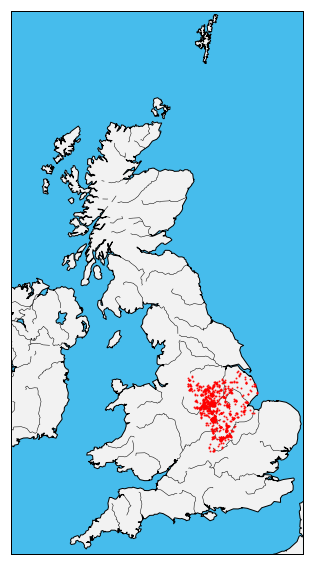

In [11]:
## Initialize the map
fig, ax = plt.subplots(figsize=(10,10))
m = Basemap(llcrnrlon=-7.5600,llcrnrlat=49.7600,
            urcrnrlon=2.7800,urcrnrlat=60.840,
            resolution='i', # Set using letters, e.g. c is a crude drawing, f is a full detailed drawing
            projection='tmerc', # The projection style is what gives us a 2D view of the world for this
            lon_0=-4.36,lat_0=54.7, # Setting the central point of the image
            epsg=27700) # Setting the coordinate system we're using

m.drawmapboundary(fill_color='#46bcec') # Make your map into any style you like
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec') # Make your map into any style you like
m.drawcoastlines()
m.drawrivers() # Default colour is black but it can be customised
m.drawcountries()

# visualizing the data using long lats

df['lat_lon'] = list(zip(df.Easting, df.Northing)) # Creating tuples

for i in df[-1000:]['lat_lon']:
    x,y = i
    m.plot(x, y, marker = 'o', c='r', markersize=1, alpha=0.8, latlon=False)
    
plt.show()